In [1]:
import pandas as pd
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import pandas as pd


In [4]:
data=pd.read_csv("/content/boston.csv")
data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


In [5]:
corr = data.corr()
corr.shape

(14, 14)

In [6]:
X =data.drop(['MEDV'], axis = 1)# data['area']#
y = data['MEDV']

In [7]:
X


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48


In [8]:
y

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: MEDV, Length: 506, dtype: float64

In [9]:
y.describe()


count    506.000000
mean      22.532806
std        9.197104
min        5.000000
25%       17.025000
50%       21.200000
75%       25.000000
max       50.000000
Name: MEDV, dtype: float64

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state =0)

In [11]:
from sklearn.preprocessing import MinMaxScaler
# Instantiate the scaler and fit to training dataset, X_train
scaler = MinMaxScaler()
scaler.fit(X_train)
# Replace unscaled values with scaled values
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)


In [12]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout


In [13]:
model = Sequential()
model.add(Dense(64, input_dim =13, activation = 'relu'))
model.add(Dropout(0.15))
model.add(Dense(64, activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(40, activation = 'relu'))
model.add(Dropout(0.15))
model.add(Dense(54, activation = 'relu'))
model.add(Dropout(0.18))
model.add(Dense(1, activation = 'linear'))

In [14]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics = ['mse', 'mae'])

In [16]:
history = model.fit(X_train, y_train, validation_split=0.2, epochs=200)

Epoch 1/200
9/9 [==============================] - 2s 31ms/step - loss: 604.1766 - mse: 604.1766 - mae: 22.7866 - val_loss: 558.7574 - val_mse: 558.7574 - val_mae: 21.8136
Epoch 2/200
9/9 [==============================] - 0s 8ms/step - loss: 580.9667 - mse: 580.9667 - mae: 22.2616 - val_loss: 527.2603 - val_mse: 527.2603 - val_mae: 21.0882
Epoch 3/200
9/9 [==============================] - 0s 6ms/step - loss: 534.6669 - mse: 534.6669 - mae: 21.2061 - val_loss: 464.0966 - val_mse: 464.0966 - val_mae: 19.5435
Epoch 4/200
9/9 [==============================] - 0s 8ms/step - loss: 445.2661 - mse: 445.2661 - mae: 18.9618 - val_loss: 340.6350 - val_mse: 340.6350 - val_mae: 16.0990
Epoch 5/200
9/9 [==============================] - 0s 8ms/step - loss: 288.9067 - mse: 288.9067 - mae: 14.1113 - val_loss: 157.5485 - val_mse: 157.5485 - val_mae: 9.6615
Epoch 6/200
9/9 [==============================] - 0s 7ms/step - loss: 145.4208 - mse: 145.4208 - mae: 9.2602 - val_loss: 99.0214 - val_mse: 99.0

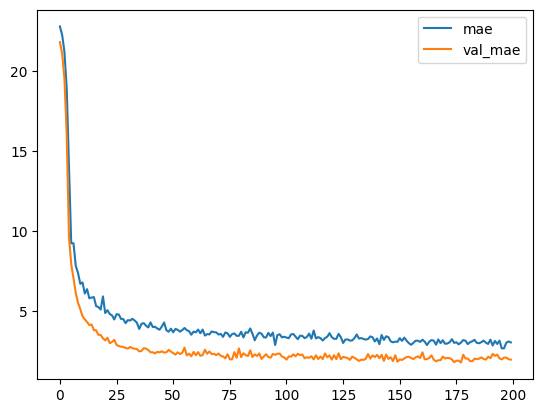

In [17]:
import matplotlib.pyplot as plt
#plot the loss and validation loss of the dataset
plt.plot(history.history['mae'], label='mae')
plt.plot(history.history['val_mae'], label='val_mae')
plt.legend()

In [18]:
scores = model.evaluate(X_test, y_test, verbose = 0)
print('Mean Squared Error : ', scores[1])
print('Mean Absolute Error : ', scores[2])

Mean Squared Error :  19.834243774414062
Mean Absolute Error :  2.9348995685577393


In [19]:
Y_pred = model.predict(X_test)
Y_pred


5/5 [==============================] - 0s 2ms/step


array([[23.08288  ],
       [25.445478 ],
       [23.72251  ],
       [10.669009 ],
       [19.010742 ],
       [18.381573 ],
       [21.66934  ],
       [19.20425  ],
       [17.658184 ],
       [18.276203 ],
       [ 9.06913  ],
       [13.179314 ],
       [14.382017 ],
       [10.218847 ],
       [37.032467 ],
       [32.512524 ],
       [22.76728  ],
       [39.262104 ],
       [29.0156   ],
       [20.239    ],
       [21.557764 ],
       [20.130766 ],
       [18.382204 ],
       [24.669872 ],
       [19.999332 ],
       [14.857628 ],
       [16.345768 ],
       [16.58125  ],
       [41.64453  ],
       [17.345871 ],
       [15.60563  ],
       [16.571932 ],
       [18.580769 ],
       [19.593046 ],
       [26.705896 ],
       [19.268476 ],
       [ 9.931307 ],
       [26.858744 ],
       [15.7981205],
       [13.827662 ],
       [22.61762  ],
       [19.776619 ],
       [20.615816 ],
       [15.223377 ],
       [21.167711 ],
       [22.790623 ],
       [18.02556  ],
       [14.88

In [20]:
from sklearn.metrics import r2_score
print('r2 score: ', r2_score(y_test,Y_pred))

r2 score:  0.7617951851840141


5/5 [==============================] - 0s 2ms/step


[]

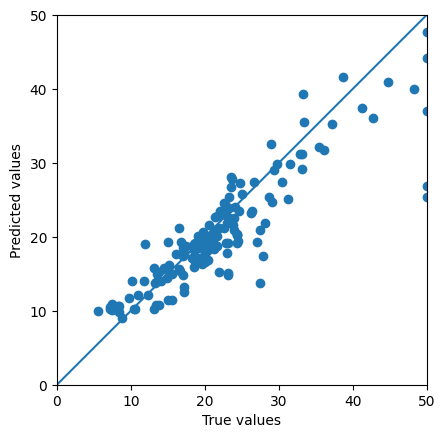

In [21]:
Y_pred = model.predict(X_test)
a = plt.axes(aspect='equal')
plt.xlabel('True values')
plt.ylabel('Predicted values')
plt.xlim([0, 50])
plt.ylim([0, 50])
plt.plot([0, 50], [0,50])
plt.scatter(y_test,Y_pred)
plt.plot()

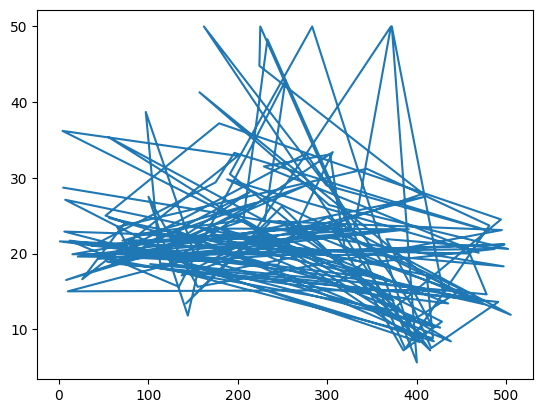

In [22]:
plt.plot(y_test)


array([[23.08288  ],
       [25.445478 ],
       [23.72251  ],
       [10.669009 ],
       [19.010742 ],
       [18.381573 ],
       [21.66934  ],
       [19.20425  ],
       [17.658184 ],
       [18.276203 ],
       [ 9.06913  ],
       [13.179314 ],
       [14.382017 ],
       [10.218847 ],
       [37.032467 ],
       [32.512524 ],
       [22.76728  ],
       [39.262104 ],
       [29.0156   ],
       [20.239    ],
       [21.557764 ],
       [20.130766 ],
       [18.382204 ],
       [24.669872 ],
       [19.999332 ],
       [14.857628 ],
       [16.345768 ],
       [16.58125  ],
       [41.64453  ],
       [17.345871 ],
       [15.60563  ],
       [16.571932 ],
       [18.580769 ],
       [19.593046 ],
       [26.705896 ],
       [19.268476 ],
       [ 9.931307 ],
       [26.858744 ],
       [15.7981205],
       [13.827662 ],
       [22.61762  ],
       [19.776619 ],
       [20.615816 ],
       [15.223377 ],
       [21.167711 ],
       [22.790623 ],
       [18.02556  ],
       [14.88

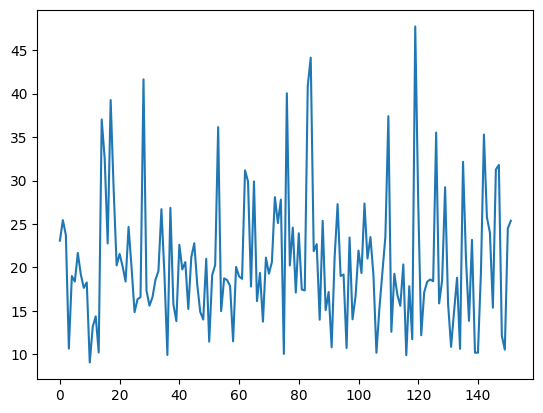

In [23]:
plt.plot(Y_pred)
Y_pred

In [24]:
print(Y_pred[:5])
print(y_test[:5])
y_test.head()

[[23.08288 ]
 [25.445478]
 [23.72251 ]
 [10.669009]
 [19.010742]]
329    22.6
371    50.0
219    23.0
403     8.3
78     21.2
Name: MEDV, dtype: float64


329    22.6
371    50.0
219    23.0
403     8.3
78     21.2
Name: MEDV, dtype: float64

In [25]:
# Import library for Linear Regression
from sklearn.linear_model import LinearRegression


In [26]:
#  Create a Linear regressor
lm = LinearRegression()
# Train the model using the training sets 
lm.fit(X_train, y_train)

LinearRegression()

In [27]:
# Value of y intercept
lm.intercept_

28.15228603154898

In [28]:
coeffcients = pd.DataFrame([X.columns,lm.coef_]).T
coeffcients = coeffcients.rename(columns={0: 'Attribute', 1: 'Coefficients'})
coeffcients


,Attribute,Coefficients
0,CRIM,-10.792972
1,ZN,4.446643
2,INDUS,0.309401
3,CHAS,2.511246
4,NOX,-7.888389
5,RM,20.140476
6,AGE,-0.96956
7,DIS,-16.431402
8,RAD,5.5693
9,TAX,-5.801525


In [29]:
# Model prediction on train data
y_pred = lm.predict(X_train)

In [31]:
# Model Evaluation
print('R^2:',metrics.r2_score(y_train, y_pred))
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_train, y_pred))*(len(y_train)-1)/(len(y_test)))
print('MAE:',metrics.mean_absolute_error(y_train, y_pred))
print('MSE:',metrics.mean_squared_error(y_train, y_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_train, y_pred)))

R^2: 0.7645451026942549
Adjusted R^2: 0.4531869819149472
MAE: 3.103606103908003
MSE: 19.958219814238046
RMSE: 4.4674623461466405


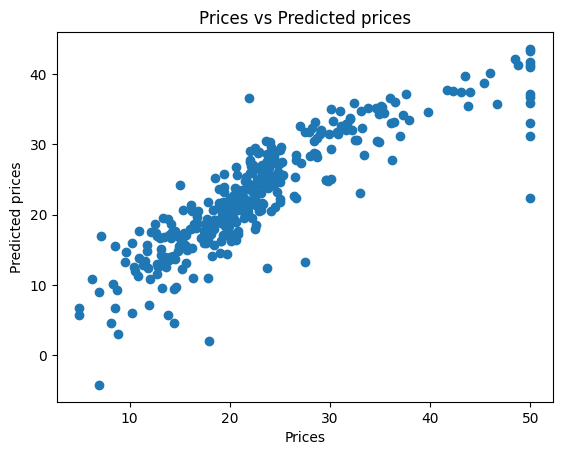

In [32]:
# Visualizing the differences between actual prices and predicted values
plt.scatter(y_train, y_pred)
plt.xlabel("Prices")
plt.ylabel("Predicted prices")
plt.title("Prices vs Predicted prices")
plt.show()

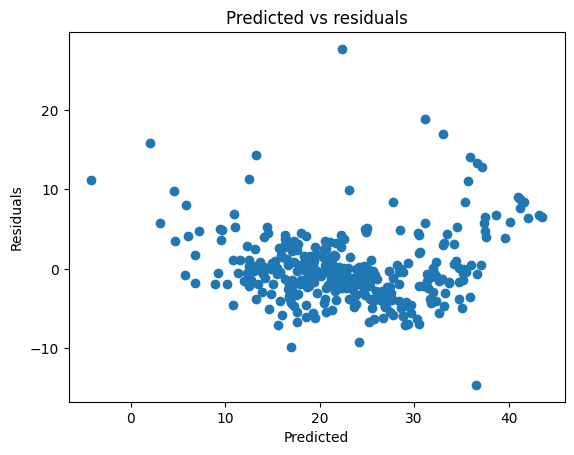

In [33]:
# Checking residuals
plt.scatter(y_pred,y_train-y_pred)
plt.title("Predicted vs residuals")
plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.show()

In [34]:
y_test_pred = lm.predict(X_test)

In [35]:
# Model Evaluation
acc_linreg = metrics.r2_score(y_test, y_test_pred)
print('R^2:', acc_linreg)
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_test, y_test_pred))*(len(y_test)-1)/(len(y_test_pred)))
print('MAE:',metrics.mean_absolute_error(y_test, y_test_pred))
print('MSE:',metrics.mean_squared_error(y_test, y_test_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

R^2: 0.6733825506400193
Adjusted R^2: 0.6755313496489666
MAE: 3.6099040603818127
MSE: 27.195965766883223
RMSE: 5.214975145375405
